# Sign Language

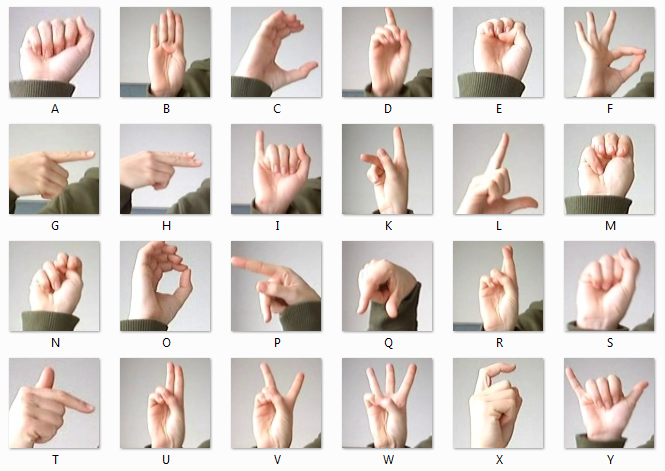

In [ ]:
from IPython.display import Image
Image("/content/drive/My Drive/Colab Notebooks/Sign - DL/amer_sign2.png")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


TIMEOUT: ignored

# About the data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling

In [ ]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sign - DL/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sign - DL/sign_mnist_test/sign_mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
report = pandas_profiling.ProfileReport(train)
report

NameError: ignored

In [ ]:
test.shape

(7172, 785)

In [ ]:
train.shape

(27455, 785)

In [ ]:
np.sqrt(784)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Let's see what does each sign means

In [ ]:
Image("../input/american_sign_language.PNG")

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [ ]:
labels = train['label'].values

In [ ]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

# Data exploration

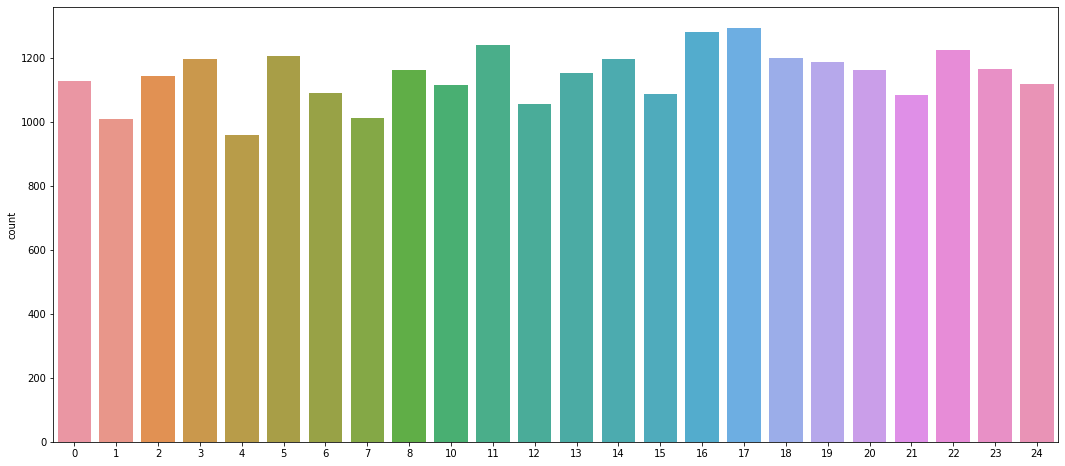

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

As you can see each one is almost equally distributed

In [ ]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [ ]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
images.shape

(27455, 784)

In [ ]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

Lets see how the images look

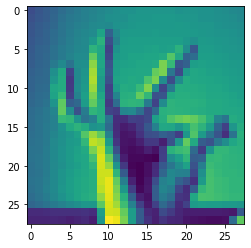

In [ ]:
plt.imshow(images[2020].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

For deep learning i am using keras library

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM

Creating the batch size to 128 and using 50 epochs

In [ ]:
batch_size = 128
num_classes = 24
epochs = 7

Normalizing the training and test data

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

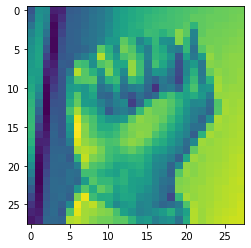

In [ ]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [ ]:
model_1 = Sequential()
model_1.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = (2, 2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dropout(0.20))

model_1.add(Dense(num_classes, activation = 'softmax'))

In [ ]:
model_1.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model_1.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Train on 19218 samples, validate on 8237 samples
Epoch 1/7
19218/19218 [==============================] - 27s 1ms/step - loss: 2.6437 - acc: 0.1849 - val_loss: 1.7998 - val_acc: 0.4492
Epoch 2/7
19218/19218 [==============================] - 26s 1ms/step - loss: 1.3627 - acc: 0.5476 - val_loss: 0.8688 - val_acc: 0.7261
Epoch 3/7
19218/19218 [==============================] - 26s 1ms/step - loss: 0.7824 - acc: 0.7313 - val_loss: 0.5430 - val_acc: 0.8212
Epoch 4/7
19218/19218 [==============================] - 26s 1ms/step - loss: 0.5312 - acc: 0.8139 - val_loss: 0.3567 - val_acc: 0.8818
Epoch 5/7
19218/19218 [==============================] - 26s 1ms/step - loss: 0.3599 - acc: 0.8762 - val_loss: 0.2295 - val_acc: 0.9278
Epoch 6/7
19218/19218 [==============================] - 27s 1ms/step - loss: 0.2632 - acc: 0.9091 - val_loss: 0.1817 - val_acc: 0.9455
Epoch 7/7
19218/19218 [==============================] - 26s 1ms/step - loss: 0.1841 - acc: 0.9402 - val_loss: 0.0937 - val_acc: 0.9790

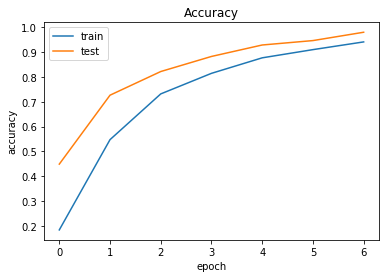

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

As you can see, the number of epochs increase the accuracy also increases.

Let's validate with the test data

In [ ]:
test_labels = test['label']

In [ ]:
test.drop('label', axis = 1, inplace = True)

In [ ]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [ ]:
test_images.shape

(7172, 784)

In [ ]:
test_labels = label_binrizer.fit_transform(test_labels)

In [ ]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
test_images.shape

(7172, 28, 28, 1)

In [ ]:
test_labels[1000]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
test_labels.shape

(7172, 24)

Predecting with test images

In [ ]:
y_pred = model_1.predict(test_images)

In [ ]:
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_lables=label_binrizer.inverse_transform(y_pred)



In [ ]:
y_lables

array([ 6,  5, 10, ..., 14,  4, 14])

In [ ]:
faltaria elegir las letras para pasarlas al text predictor 

In [ ]:
chars_img=('a','b', 'c', 'd', 'e','f','g', 'h','i','k','l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y')

In [ ]:
int_to_char_img = dict((i, c) for i, c in enumerate(chars_img))

In [ ]:
int_to_char_img[2]

'c'

In [ ]:
#convert char form sign recognition to char of text predction
chars = ('\n', ' ', '!', '"', "'", '(', ')', '*', ',', '-', '.', '0', '3', ':', ';', '?', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z')


In [ ]:
len(chars)

45

In [ ]:
i=0

char_to_int = dict((c, i) for i, c in enumerate(chars))

In [ ]:
char_to_int['l']

30

In [ ]:
dataX=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
len(dataX)

100

In [ ]:
dataX[97]=21
dataX[98]=30
dataX[99]=19

In [ ]:
dataY=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44]

In [ ]:
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical

# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (1, len(dataX), 1))
# normalize
X = X / len(chars)
# one hot encode the output variable
#dataY=np.array(dataY)
y = np_utils.to_categorical(dataY)
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
ls /content/drive/'My Drive'

 1_Regression_OSA.ipynb      Info_BDApnea_QuironMalaga.xlsx   RECM-SCOM/
 APMICRO/                   'ISIN '/                          SSMM/
'Carta mama.gdoc'            L3_MariaBrull.zip                Sw.zip
'Colab Notebooks'/           MANU-MARIA/                      tfg/
 EAML/                       Material_L2.zip                  VADL/
 english/                    OSA-python/                      Vodafone/
 GPRO-PROJECT/               preguntas/                       Weight/
'Guided Tour VALENCIA.pdf'  'Proyecto: HOP IN'/


In [ ]:

! cp /content/drive/'My Drive'/'Colab Notebooks'/weights-improvement-112-0.3997.hdf5 weights.hdf5

In [ ]:
# define the LSTM model
model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

#model.summary()

In [ ]:
# load the network weights
filename = "weights.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [ ]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [ ]:
import sys

#pick a random seed
pattern = dataX

#pattern = dataX[0]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
print('\n GENERATE: \n')

# generate characters
for i in range(1):
  x = np.reshape(pattern, (1, len(pattern), 1))
  x = x / len(chars)
  prediction = model.predict(x, verbose=0)
  index = np.argmax(prediction)
  result = int_to_char[index]
 
  #print every ouput character
  sys.stdout.write(result)
  
  # add output char
  #pattern.append(index)
  # remove first char
  #pattern = pattern[1:len(pattern)]
  
print("\nDone.")

Seed:
"                     
                    
                    
                    
             cla "

 GENERATE: 

p
Done.


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(test_labels, y_pred.round())

0.8127440044617958

As we can see we got a really great accuracy 

We can increate the accuracy by tuning the hyper parameters of the model like playing with different activation functions and using different loss functions